# **Project Name** : **Spam Email Classification using Machine Learning**

# **WorkFlow:**
- Importing necessary libraries and dependencies
- Load and Explore the dataset
- Data Preprocessing
- Splitting Dataset, Train & Test set / Feature Extraction & Model Training - Bag Of Words Vectorization Technique
- Splitting Dataset, Train & Test set / Feature Extraction & Model Training - TfIdf Vectorizer
- SPAM Detection : BOW Method and Four Classification Algorithms Result
- SPAM Detection : TFIDF Method and Four Classification Algorithms Result

# **Importing necessary libraries and dependencies**

In [ ]:
# Importing Numpy & Pandas for data processing
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import itertools
%matplotlib inline
# Importing for machine learning models implementation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
# Word Cloud libraries for making wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Importing the CountVectorizer class from scikit-learn for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
# splitting the dataset
from sklearn.model_selection import train_test_split
# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Load & Explore the dataset**

**Question 1.1: Programmatically load the attached data into your favorite analytical tool in Python (you can use Pandas)**

In [ ]:
# Mount Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset from drive
train_df = pd.read_csv('/content/drive/MyDrive/Projects__Github_/SPAM-notSPAM Email Classification __MLEngineer/Datasets/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Projects__Github_/SPAM-notSPAM Email Classification __MLEngineer/Datasets/test.csv')

In [ ]:
#display the first 10 rows of DataFrame, train_df
train_df.head(10)

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam
5,37c9e5f8-6629-4e16-9568-32e12ef30c89,6,"Subject: wonderful phamraceuticals , everythin...",spam
6,f200be81-9a56-4b61-9c09-c8123302c654,2,"Subject: re : shalesh\njim ,\ni agree with you...",not_spam
7,6cb661a5-4974-4a27-ae45-3fd1602589b2,5,Subject: you have successfully added a new ema...,spam
8,dd060921-d3f2-426f-98af-2e8232ead7e1,6,"Subject: this stock is fantastic\nhughes ,\nvc...",spam
9,6b4477bc-e819-45ce-8730-8724c553dc66,4,Subject: all employee meeting today at 8 : 00 ...,not_spam


In [ ]:
#display the first 10 rows of DataFrame, test_df
test_df.head(10)

,id_,source,email
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,5,Subject: get me thru july newsletter\nthe get ...
1,cbe49c1c-b328-4716-9b78-9169c6111e80,4,Subject: looking for a good match to take out ...
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,4,"Subject: fw : besides our special pricing , yo..."
3,b696569e-f7de-4771-9946-be5dd477b2f6,5,Subject: access to mary solmonson ' s e - mail...
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,2,Subject: software should be easy to use !\nsev...
5,b0529af0-16fe-48e0-814d-b6e2bc32f15d,6,"Subject: get laid !\nmeet real women , couples..."
6,e2e15127-69ef-41f0-9c18-226d3c6a26aa,5,Subject: all star break special : get a flag t...
7,c37a27dd-94f7-4d51-87b2-8e5ce7a2ee95,3,"Subject: vng asset deal\nlouise , i just recei..."
8,8442a86b-45e5-44bf-b4c4-180e4a7aa3f5,4,"Subject: borax craig\npaliourg , %\nvaliumxana..."
9,2dad8cd8-bb08-475f-8a5b-093ce852decf,6,Subject: royalization eighteen girls cneoraceo...


In [ ]:
# Checking number of rows and columns of the dataset

print(train_df.shape)
print("Number of rows are: ",train_df.shape[0])
print("Number of columns are: ",train_df.shape[1])

(15000, 4)
Number of rows are:  15000
Number of columns are:  4


In [ ]:
train_df.columns.tolist()  #column list of the dataframe

['id_', 'source', 'email', 'class']

In [ ]:
train_df.dtypes   #the dataset contains object type data

,0
id_,object
source,int64
email,object
class,object


**Question 1.3: Prepare a short EDA report on the dataset (with visualizations).**

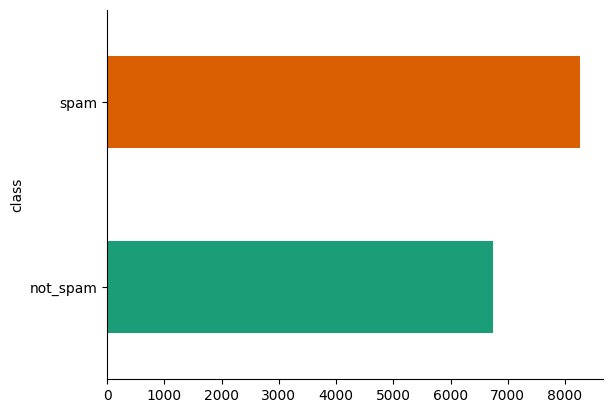

In [ ]:
# Visualize the distribution of the 'class' column
train_df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Identifying Common Values #Frequency Distribution
train_df['class'].value_counts()

,count
class,
spam,8254
not_spam,6746


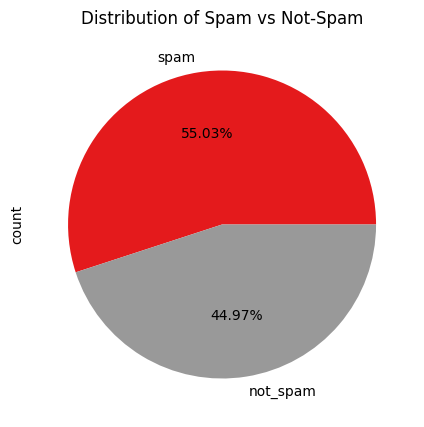

In [ ]:
#Pie Chart Visualization #class column
spread = train_df['class'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Not-Spam')

# Display the Chart
plt.show()

**Checking Unique Data**

In [ ]:
unique_data = train_df.groupby(['id_', 'source', 'email', 'class']).size().reset_index().rename(columns={0: 'count'})
unique_data[unique_data['count'] > 1]

,id_,source,email,class,count


In [ ]:
# Check Unique Values for each variable using a for loop, a set of list
for i in train_df.columns.tolist():
  print("No. of unique values in",i,"is",train_df[i].nunique())

No. of unique values in id_ is 15000
No. of unique values in source is 5
No. of unique values in email is 14254
No. of unique values in class is 2


In [ ]:
train_df.info() #perfect for understanding the basic structure and completeness of your DataFrame, including data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_     15000 non-null  object
 1   source  15000 non-null  int64 
 2   email   15000 non-null  object
 3   class   15000 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
train_df.describe() #describe() helps to find patterns, trends, and outliers in the data and get statistical insights(Univariate Analysis- Measures of the Central tendency and the Dispersion)

,source
count,15000.000000
mean,4.007333
std,1.426259
min,2.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,6.000000


# **Data Preprocessing**

**Question 1.2: Perform necessary preprocessing to sanitize the data and handle problematic data points.**

**Data Cleaning & Handling**
- Drop unnecessary columns
- Handle missing data
- Handle duplicate data

**Drop unnecessary columns**

In [ ]:
train_df.drop(columns=['id_', 'source'], inplace=True)
train_df.head()

,email,class
0,Subject: is the supply rebound beginning ? an ...,not_spam
1,Subject: email list - 100 million addresses $ ...,spam
2,Subject: alley dodecahedra suicide\nare you re...,spam
3,Subject: ibuyit project\ni wanted to share som...,not_spam
4,Subject: cheap vicodin online - us fda pharmac...,spam


In [ ]:
train_df.columns.tolist()

['email', 'class']

**Handling Missing Data**

**Key Differences of isnull() and isna()**

**isnull().sum()**

- Provides the exact count of missing values in each column.
Useful for understanding the extent of missing data.

**isna().any()**

- Provides a boolean indicator for whether any missing values exist in each column.
- Useful for quickly checking if any column has missing data at all.

In [ ]:
# checking the specific number of missing entries per column.
train_df.isnull().sum()

,0
email,0
class,0


In [ ]:
#checking if any column contains missing data, without caring about the exact number.
train_df.isna().any()

,0
email,False
class,False


***As there is no missing values found, there is no need of applying the method of removing the missing data/ fill/follow any imputation or predictive modelling methods for handling missing data.***

**Handling duplicate data**

In [ ]:
# Duplicate Values checking
train_df.duplicated().sum()

746

***As there is no duplicate values in the dataset, there is no need of the step of dropping duplicate data/follow any custom handling method.***

**2. Data Transformation:**
- Encoding Categorical Variables uding LabelEncoder
- Transform Text Data

**Using Label Encoding Method : assigning unique numbers to each category**
**Labelling spam ->1 and not_spam -> 0**

In [ ]:
le = LabelEncoder()
train_df['class'] = le.fit_transform(train_df['class'])

train_df.loc[train_df['class'] == 'spam', 'class',] = 0
train_df.loc[train_df['class'] == 'not-spam', 'class',] = 1

In [ ]:
train_df.head(5)

,email,class
0,Subject: is the supply rebound beginning ? an ...,0
1,Subject: email list - 100 million addresses $ ...,1
2,Subject: alley dodecahedra suicide\nare you re...,1
3,Subject: ibuyit project\ni wanted to share som...,0
4,Subject: cheap vicodin online - us fda pharmac...,1


**Wordcloud Visualization**

*   SPAM Emails WORDCLOUD
*   Not-SPAM Emails WORDCLOUD

In [ ]:
train_df.head()

,email,class
0,Subject: is the supply rebound beginning ? an ...,0
1,Subject: email list - 100 million addresses $ ...,1
2,Subject: alley dodecahedra suicide\nare you re...,1
3,Subject: ibuyit project\ni wanted to share som...,0
4,Subject: cheap vicodin online - us fda pharmac...,1


In [ ]:
# Splitting dataset as Spam Emails
df_spam = train_df[train_df['class']==1].copy()
df_spam.head()

,email,class
1,Subject: email list - 100 million addresses $ ...,1
2,Subject: alley dodecahedra suicide\nare you re...,1
4,Subject: cheap vicodin online - us fda pharmac...,1
5,"Subject: wonderful phamraceuticals , everythin...",1
7,Subject: you have successfully added a new ema...,1


In [ ]:
# Splitting dataset as Not-Spam Emails
df_NotSpam = train_df[train_df['class']==0].copy()
df_NotSpam.head()

,email,class
0,Subject: is the supply rebound beginning ? an ...,0
3,Subject: ibuyit project\ni wanted to share som...,0
6,"Subject: re : shalesh\njim ,\ni agree with you...",0
9,Subject: all employee meeting today at 8 : 00 ...,0
11,"Subject: agreements\njohn and louise ,\ni hope...",0


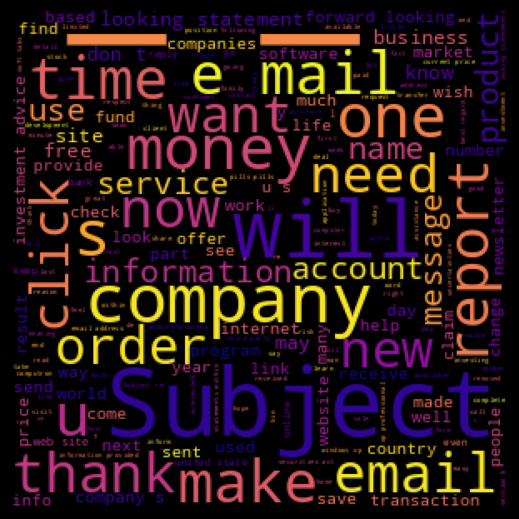

In [ ]:
# Frequent Spam emails

spam=' '.join(list(df_spam[df_spam['class']==1]['email']))
spam_wordcloud = WordCloud(width=300, height=300, colormap='plasma').generate(spam)
plt.figure(figsize=(10,5),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

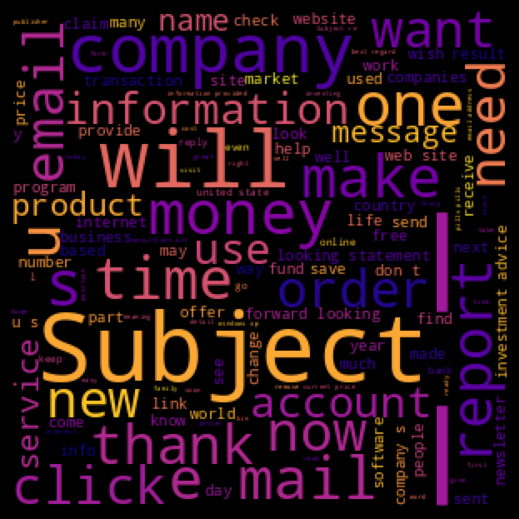

In [ ]:
# Frequent not-Spam emails


notspam=' '.join(list(df_spam[df_spam['class']==1]['email']))
spam_wordcloud = WordCloud(width=300, height=300, colormap='plasma').generate(notspam)
plt.figure(figsize=(10,5),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Transform Text Data**
The column "email" contains the text data, it needs preprocessing and transformation.
- Text cleaning, tokenization, Stopwords removal, Stemming & Lemmatization
- Text Vectorization

In [ ]:
# Separating the data as email and class columns

X = train_df['email']
y = train_df['class']

In [ ]:
texts=X.copy() #making copy of X

In [ ]:
texts.head(10)

,email
0,Subject: is the supply rebound beginning ? an ...
1,Subject: email list - 100 million addresses $ ...
2,Subject: alley dodecahedra suicide\nare you re...
3,Subject: ibuyit project\ni wanted to share som...
4,Subject: cheap vicodin online - us fda pharmac...
5,"Subject: wonderful phamraceuticals , everythin..."
6,"Subject: re : shalesh\njim ,\ni agree with you..."
7,Subject: you have successfully added a new ema...
8,"Subject: this stock is fantastic\nhughes ,\nvc..."
9,Subject: all employee meeting today at 8 : 00 ...


In [ ]:
texts[15]

"Subject: re : helsinki report\nfernley ,\ngenerally , this seems to be fine . i think that steve and i would like to\nclarify the credit limit review issue . please see him for some semantical\nchanges to that one line .\nregarding the expected / maximum exposure calculation , i believe that this is\nincredibly misleading and if not changed would be inclined to forward my own\ninterpretation . we lost $ 18 mm ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! - not $ 5 mm . i think\nthat we should make a distinction between what has already been realized as\nopposed to what writedowns need to be taken , but it all better add up to\n$ 18 mm . regarding the additional exposures , my impression is that our true\nexpectation for counterparty claims is close to zero while we do expect to\nterminate one or more employees which would incur severance cost .\nted\nfernley dyson\n01 / 31 / 2000 11 : 10 am\nto : sally beck / hou / ect @ ect , ted murphy / hou / ect @ ect , wes colwell / hou / ect @ ect\ncc :

**Text cleaning, tokenization, Stopwords removal, Stemming & Lemmatization**

In [ ]:
# Cleaning the texts
corpus = []
for i in range(0,len(texts)):
    textClean = re.sub('[^a-zA-Z]', ' ',str((texts[i]))) # Removes all the special characters, digits from 0-9 and Capital Letters
    textClean = textClean.lower()
    textClean = textClean.split()
    ps = PorterStemmer()
    textClean = [ps.stem(word) for word in textClean if not word in set(stopwords.words('english'))]
    textClean = ' '.join(textClean)
    corpus.append(textClean)

In [ ]:
corpus[10] #after cleaning

'subject highest gain without guesswork itec environment group inc otcbb itec research partnership honeywel fm itec develop successfuliy commerci revolutionari new system recycl piastic contain sourc news current price whiie past perform ne ver indic futur resuit price volum dramaticaliy pick march trend continu think may want wait unti late reason consid itec sourc recent press reieas itec environmenta group inc project continu growth increas revenu connect h muehlstein agreement commit piastic recycl corp california plastic recyci corp california prcc commit make avail itec miilion pound materia per year upon successfu complet first piant compani believ wiil seil approxim miilion pound pet hdpe fiak gener approximateiy million revenu first year oper ebitda approximateiy miliion gross profit margin itec environmenta group inc enter letter intent acquir rose wast system inc year oid engin sale compani anticip revenu oo east miliion exchang oo ooo share common stock itec itec environmen

# **Text feature extraction : Text vectorization methods**
- Bag of Words
- TfidfVectorizer
- Word Embeddings(GloVe)
- Contextual Embeddings (BERT)

### **Question 2: Spam Detection**
- **Question 2.1: Build an intelligent system to detect spam emails. You can use any approach you prefer. However, we encourage you to focus on simplicity and effectiveness. Provide relevant metrics.**

# **Splitting Dataset, Train & Test set / Feature Extraction & Model Training - Bag Of Words Vectorization Technique**
# **RESULT of Different ALgorithms:**
- Multinomial NB Algorithm
- Decision Tree Classifier Algorithm
- RandomForest Classifier Algorithm
- Adaboost Classifier Algorithm

In [ ]:
#bag of words

cv = CountVectorizer(max_features=5000,ngram_range=(1,2)) # Fit the data with CounterVectorizer
X = cv.fit_transform(X).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv.get_feature_names_out()[:10]

array(['00', '00 00', '00 am', '00 pm', '000', '000 00', '000 000',
       '0000', '01', '01 2001'], dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
# show resulting vocabulary;
#the numbers are the position in the sparse vector.
cv.vocabulary_

{'subject': 3924,
 'is': 2199,
 'the': 4055,
 'supply': 3963,
 'beginning': 704,
 'an': 371,
 'update': 4566,
 'on': 2927,
 'cera': 885,
 'outlook': 3038,
 'for': 1683,
 'us': 4577,
 'gas': 1790,
 'capacity': 849,
 'conference': 1042,
 'call': 825,
 'notification': 2826,
 'title': 4326,
 'url': 4576,
 'http': 2005,
 'www': 4895,
 '20': 72,
 'com': 963,
 '35': 136,
 'netscape': 2757,
 '02': 14,
 'or': 2993,
 'higher': 1958,
 'sun': 3958,
 'hot': 1981,
 'tm': 4328,
 'close': 948,
 'all': 336,
 'applications': 499,
 'and': 385,
 'your': 4967,
 'screen': 3637,
 'to': 4329,
 'ensure': 1478,
 'computer': 1031,
 'complete': 1021,
 'internet': 2165,
 'instructions': 2146,
 'before': 698,
 'day': 1190,
 'of': 2851,
 'message': 2608,
 'will': 4802,
 'appear': 496,
 'you': 4922,
 'that': 4027,
 'meeting': 2594,
 'not': 2801,
 'ready': 3404,
 'start': 3861,
 'however': 1998,
 'it': 2239,
 'also': 352,
 'about': 220,
 'any': 481,
 'action': 256,
 'may': 2560,
 'need': 2743,
 'take': 3975,
 'prepare

In [ ]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12000, 5000)
(12000,)
(3000, 5000)
(3000,)


In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())
count_df.head()

,00,00 00,00 am,00 pm,000,000 00,000 000,0000,01,01 2001,...,your reference,your site,your time,your website,your winning,yours,yourself,zimin,zimin lu,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#confusion matrix plot

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.98
Confusion matrix, without normalization


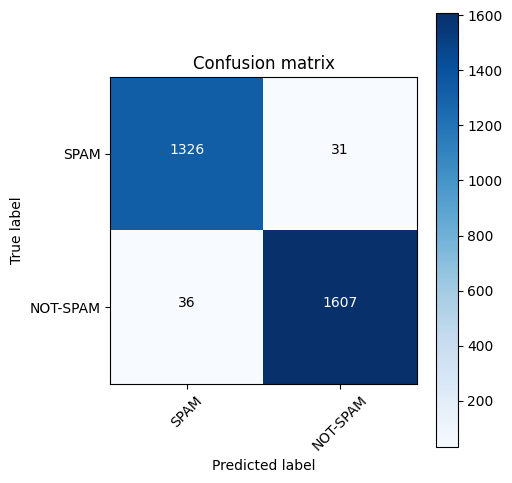

In [ ]:
### MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'NOT-SPAM'])

accuracy:   0.83
Confusion matrix, without normalization


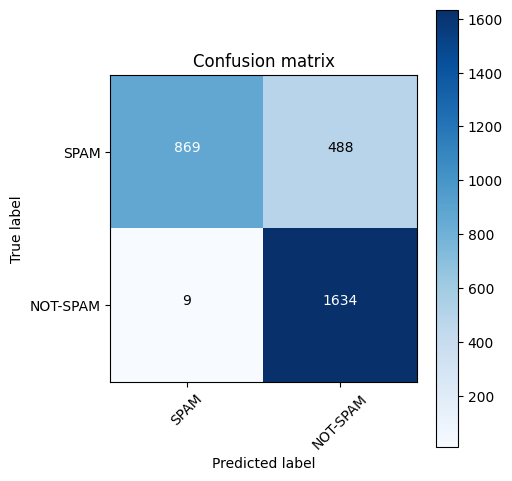

In [ ]:
### DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'NOT-SPAM'])

accuracy:   0.978
Confusion matrix, without normalization


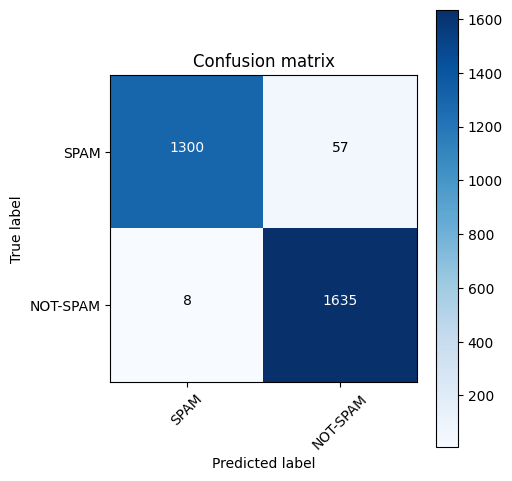

In [ ]:
### RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'NOT-SPAM'])

accuracy:   0.962
Confusion matrix, without normalization


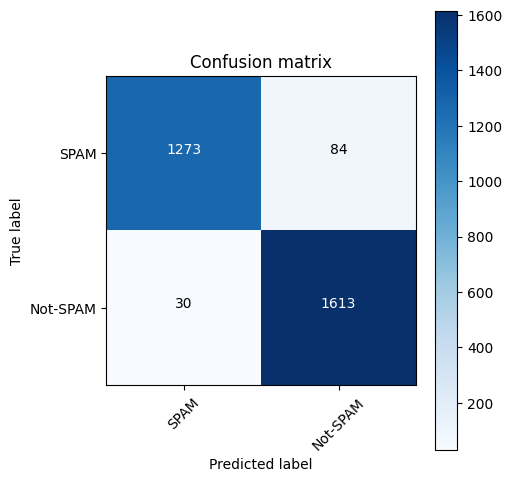

In [ ]:
### AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'Not-SPAM'])

 # **SPAM Detection : BOW Method and Four Classification Algorithms Prediction Result**

In [63]:
print(test_df['email'].iloc[10])

Subject: scott gilbert contract
i think it ' s in john ' s court . please advise as to whether it will be approved or needs to be changed . it ' s been hanging out there for about a week . thanks .


In [64]:
email_text = test_df['email'].iloc[10];

In [65]:
def email_classification_Prediction(email_text, model, vectorizer):
    email_bow = vectorizer.transform([email_text])
    prediction = model.predict(email_bow)
    return 'spam' if prediction[0] == 'spam' else 'not_spam'


In [ ]:
## prediction with Naive Bayes classifier(Multinomial MNB)

selected_model = MNB
vectorizer = cv
prediction_result = email_classification_Prediction(email_text, selected_model, vectorizer)
print("The provided email is classified as:", prediction_result)

The provided email is classified as: not_spam


In [ ]:
## prediction with Decision Tree Classifier

selected_model = dc
vectorizer = cv
prediction_result = email_classification_Prediction(email_text, selected_model, vectorizer)
print("The provided email is classified as:", prediction_result)

The provided email is classified as: not_spam


In [ ]:
## prediction with Random Forest Classifier

selected_model = rf_model
vectorizer = cv
prediction_result = email_classification_Prediction(email_text, selected_model, vectorizer)
print("The provided email is classified as:", prediction_result)

The provided email is classified as: not_spam


# **Splitting Dataset, Train & Test set / Feature Extraction & Model Training - TfIdf Vectorizer**
# **RESULT of Different ALgorithms:**
- Multinomial NB Algorithm
- Decisiontree Classifier Algorithm
- RandomForest Classifier Algorithm

In [ ]:
#TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X=tfidf.fit_transform(X).toarray()

In [ ]:
 tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
tfidf.vocabulary_

{'subject': 3924,
 'is': 2199,
 'the': 4055,
 'supply': 3963,
 'beginning': 704,
 'an': 371,
 'update': 4566,
 'on': 2927,
 'cera': 885,
 'outlook': 3038,
 'for': 1683,
 'us': 4577,
 'gas': 1790,
 'capacity': 849,
 'conference': 1042,
 'call': 825,
 'notification': 2826,
 'title': 4326,
 'url': 4576,
 'http': 2005,
 'www': 4895,
 '20': 72,
 'com': 963,
 '35': 136,
 'netscape': 2757,
 '02': 14,
 'or': 2993,
 'higher': 1958,
 'sun': 3958,
 'hot': 1981,
 'tm': 4328,
 'close': 948,
 'all': 336,
 'applications': 499,
 'and': 385,
 'your': 4967,
 'screen': 3637,
 'to': 4329,
 'ensure': 1478,
 'computer': 1031,
 'complete': 1021,
 'internet': 2165,
 'instructions': 2146,
 'before': 698,
 'day': 1190,
 'of': 2851,
 'message': 2608,
 'will': 4802,
 'appear': 496,
 'you': 4922,
 'that': 4027,
 'meeting': 2594,
 'not': 2801,
 'ready': 3404,
 'start': 3861,
 'however': 1998,
 'it': 2239,
 'also': 352,
 'about': 220,
 'any': 481,
 'action': 256,
 'may': 2560,
 'need': 2743,
 'take': 3975,
 'prepare

In [ ]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())
count_df.head()

,00,00 00,00 am,00 pm,000,000 00,000 000,0000,01,01 2001,...,your reference,your site,your time,your website,your winning,yours,yourself,zimin,zimin lu,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#confusion matrix plot

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12000, 5000)
(12000,)
(3000, 5000)
(3000,)


accuracy:   0.98
Confusion matrix, without normalization


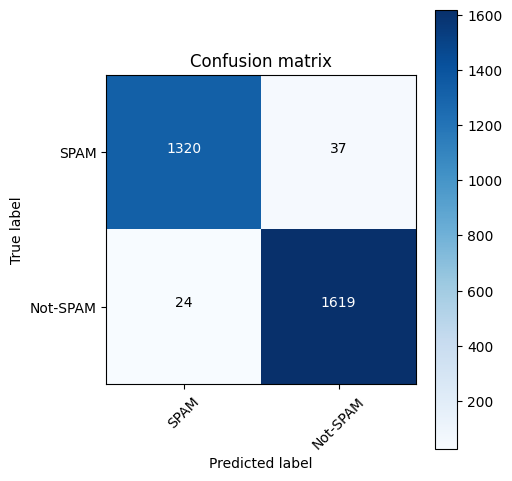

In [ ]:
### MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'Not-SPAM'])

accuracy:   0.84
Confusion matrix, without normalization


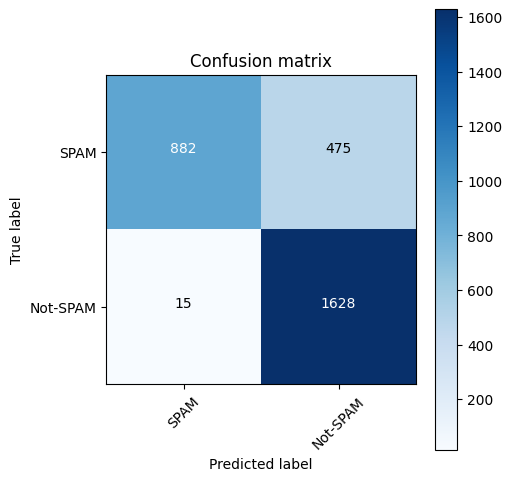

In [ ]:
### DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'Not-SPAM'])

accuracy:   0.979
Confusion matrix, without normalization


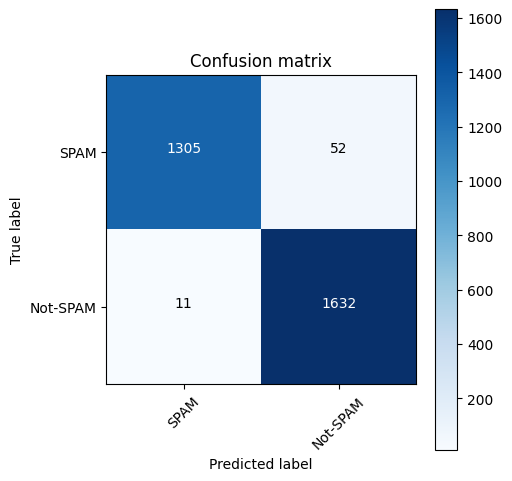

In [ ]:
### RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'Not-SPAM'])

accuracy:   0.956
Confusion matrix, without normalization


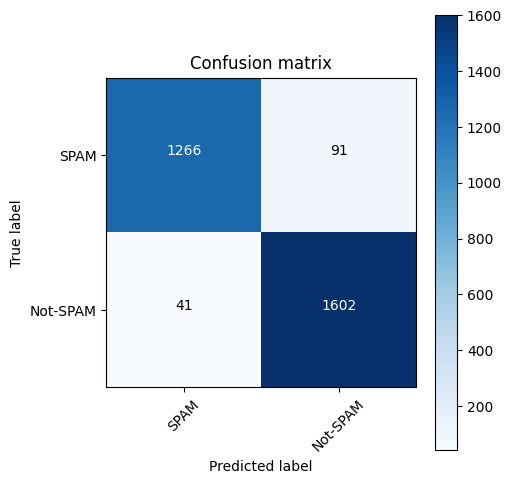

In [ ]:
### AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['SPAM', 'Not-SPAM'])

#**SPAM Detection : TFIDF Method and Four Classification Algorithms Prediction Result**

In [ ]:
def email_classification_Prediction(email_text, model, vectorizer):
    email_bow = vectorizer.transform([email_text])
    prediction = model.predict(email_bow)
    return 'spam' if prediction[0] == 'spam' else 'not_spam'

In [ ]:
print(test_df['email'].iloc[100])

Subject: fw : peoples energy board of directors
louise
i ' m in toronto with lay on april 4 th . you should attempt to go to this .
john
- - - - - original message - - - - -
from : luce , laura
sent : monday , march 12 , 2001 2 : 45 pm
to : lavorato , john ; kitchen , louise ; shively , hunter
cc : delainey , david ; pikofsky , lynn
subject : peoples energy board of directors
on april 4 , 2001 , peoples energy will hold their board of directors meeting in houston . i have been engaged with their executive team in their planning process and the schedule is as follows :
8 : 00 am to 10 : 00 am board of directors meeting - peoples energy production office , houston
10 : 30 am to 11 : 30 am enron - tour of trading floor , enron bio , etc .
12 : 00 pm to 5 : 00 pm various activities ( golf , art museum , etc )
6 : 30 pm - evening enron field , astros vs . milwaukee , enron suite - enron hosting
i am requesting introductions ( if available ) and attendance on the trading floor from each of y

In [ ]:
## prediction with Naive Bayes classifier(Multinomial MNB)

selected_model = MNB
vectorizer = tfidf
prediction_result = email_classification_Prediction(email_text, selected_model, vectorizer)
print("The provided email is classified as:", prediction_result)

The provided email is classified as: not_spam


In [ ]:
## prediction with Decision Tree Classifier

selected_model = dc
vectorizer = tfidf
prediction_result = email_classification_Prediction(email_text, selected_model, vectorizer)
print("The provided email is classified as:", prediction_result)

The provided email is classified as: not_spam


In [ ]:
## prediction with Random Forest Classifier

selected_model = rf_model
vectorizer = tfidf
prediction_result = email_classification_Prediction(email_text, selected_model, vectorizer)
print("The provided email is classified as:", prediction_result)

The provided email is classified as: not_spam
